In [36]:
import pandas as pd

from paths import *
from visualization import *

In [37]:
# from data_preparation import get_category_info
# colorScale, categoryName, AQScale = get_category_info()

In [38]:
from data_preparation import get_metadata, get_series,clip_missing_prone_values, prepare_division_and_country_series

series_with_heavy_missing, metadata_with_heavy_missing = get_series(), get_metadata()
division_missing_counts, metadata, series = clip_missing_prone_values(metadata_with_heavy_missing, series_with_heavy_missing)
region_series, metadata_region, country_series, metadata_country = prepare_division_and_country_series(series,
                                                                                                       metadata)

In [39]:
series.shape

(46704, 450)

In [40]:
region_series.shape

(46704, 21)

In [41]:
country_series.shape

(46704, 3)

In [42]:
# missing_data_heatmap(country_series)

In [43]:
# missing_data_heatmap(region_series)

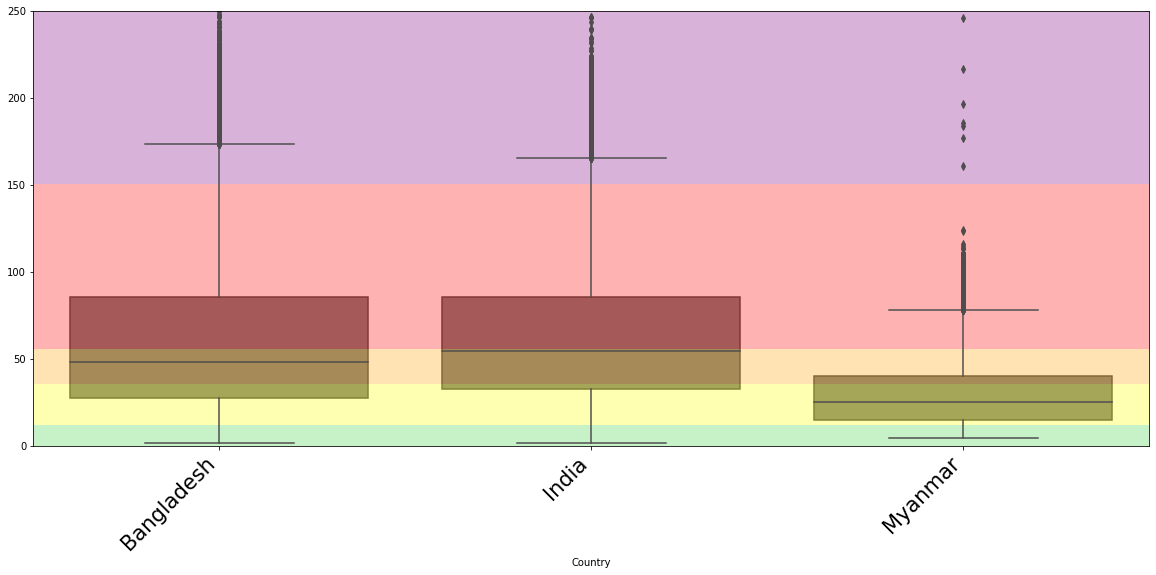

In [44]:
from visualization import box_plot_series

box_plot_series(country_series)

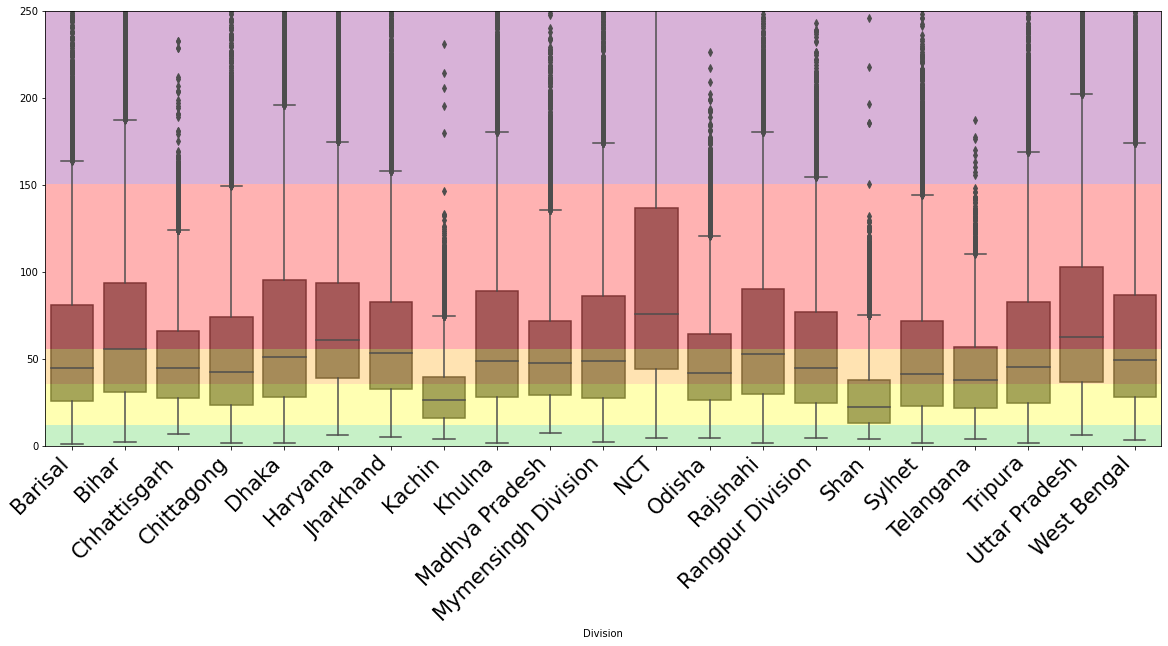

In [45]:
box_plot_series(region_series)

In [46]:
# from aq_analysis import stacked_bar
#
# stacked_bar(country_series)
# PLotlyTimeSeries(country_series)
# day_night_distribution(country_series)

In [47]:
series_bd = country_series.Bangladesh["2018":"2021"]

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# knn_imputer = KNNImputer(n_neighbors=24*90, weights="distance")
# series_bd_imputed = knn_imputer.fit_transform(series_bd.to_frame())
imputer = IterativeImputer()
series_bd_imputed = imputer.fit_transform(series_bd.to_frame())
series_bd_imputed = pd.Series(series_bd_imputed[:,0],index=series_bd.index)
series_bd_imputed.name = "Bangladesh_imputed"
series_bd_original_and_imputed = pd.concat((series_bd,series_bd_imputed),axis=1)
series_bd_original_and_imputed

,Bangladesh,Bangladesh_imputed
time,,
2018-01-01 00:00:00,115.10,115.10
2018-01-01 01:00:00,114.65,114.65
2018-01-01 02:00:00,120.66,120.66
2018-01-01 03:00:00,139.85,139.85
2018-01-01 04:00:00,147.88,147.88
...,...,...
2021-12-31 19:00:00,101.51,101.51
2021-12-31 20:00:00,109.42,109.42
2021-12-31 21:00:00,115.35,115.35


In [50]:
from plotly.subplots import make_subplots

weekend_by_country = {'Bangladesh': ['Friday', 'Saturday'], 'India': ['Saturday', 'Sunday'],
                      'Myanmar': ['Saturday', 'Sunday']}
week_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

for i, country_name in enumerate(country_series):
    day_names = country_series.index.day_name()
    week_group = country_series[country_name].groupby(day_names)
    week_info = pd.concat([week_group.mean(), week_group.std()], axis=1)
    week_info['color'] = week_info.apply(
        lambda x: '#8fcadd' if x.name in weekend_by_country[country_name] else '#ff0000', axis=1)
    week_info = week_info.reindex(week_day)

    fig.add_trace(
        # go.Scatter(x=mobility_two_year.index, y=mobility_two_year[mobility_type], fill='tozeroy', mode='lines', line_color='indigo'),
        go.Bar(
            x=week_info.index,
            y=week_info.iloc[:, 0],
            error_y=dict(type='data', array=week_info.iloc[:, 1]),
            marker_color=week_info.color  # marker color can be a single color value or an iterable
        ),
        row=i + 1, col=1)

    fig.update_yaxes(title_text=country_name + ' Reading' , row=i + 1, col=1, range=[0, 115], )

fig.update_layout(height=800, width=1600,
                  title_text="Stacked Subplots with Shared X-Axes", legend_orientation='h', font_size=15)

fig.show()

In [49]:
# range_iter = range(-12, 12 + 1)
# for i in range(12):
#     subseries = region_series[f'2021-{i + 1}':f'2021-{i + 1}']
#     cross_corr = pd.Series([subseries.Dhaka.shift(i).corr(subseries.NCT) for i in range_iter], index=range_iter)
#     print(cross_corr.idxmax())
#     # fig = px.bar(cross_corr)
#     # fig.show()